# First read the data from source and do some exploratory analysis

In [1]:
%matplotlib inline 
## Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [ ]:
## Read the dataset downloaded from provided link
## make sure to point the data in gitrepo or data link and remove pointer to my directory
data = pd.read_csv('./breast+cancer+wisconsin+diagnostic/wdbc.data', header=None)
print(data.shape)
data.head()
print(data.index)
print(data.columns)

(569, 32)
RangeIndex(start=0, stop=569, step=1)
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')


In [3]:
## the dataset do not have column names. assign them the names
## make sure they match the no. of columns in dataframe
vname  = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
len(vname)

32

In [4]:
## assign the variable names to the dataframe

data.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

data.shape

(569, 32)

In [5]:
print(data.info())
print(data.head(2))
print(data.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

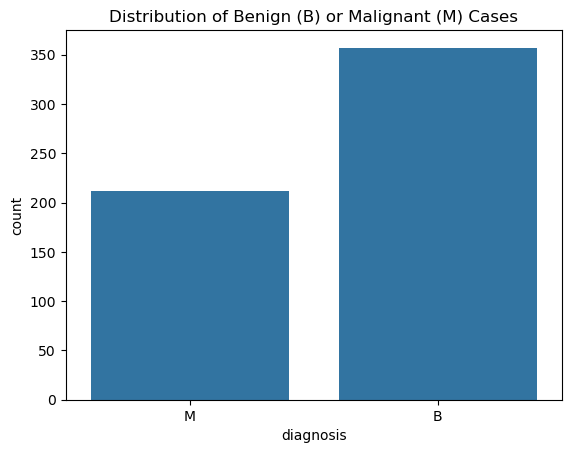

In [6]:
## count the number of benign and malignant cases
# print(data['diagnosis'].value_counts())

sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Benign (B) or Malignant (M) Cases')
plt.show()

In [7]:
## Check missing values
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
## check the summary statistics
# print(data.drop(columns='id').describe())
print(data.iloc[:, 2:12].describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [9]:
## Recode the indicator variable to binary variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
## Check the recoded variables
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

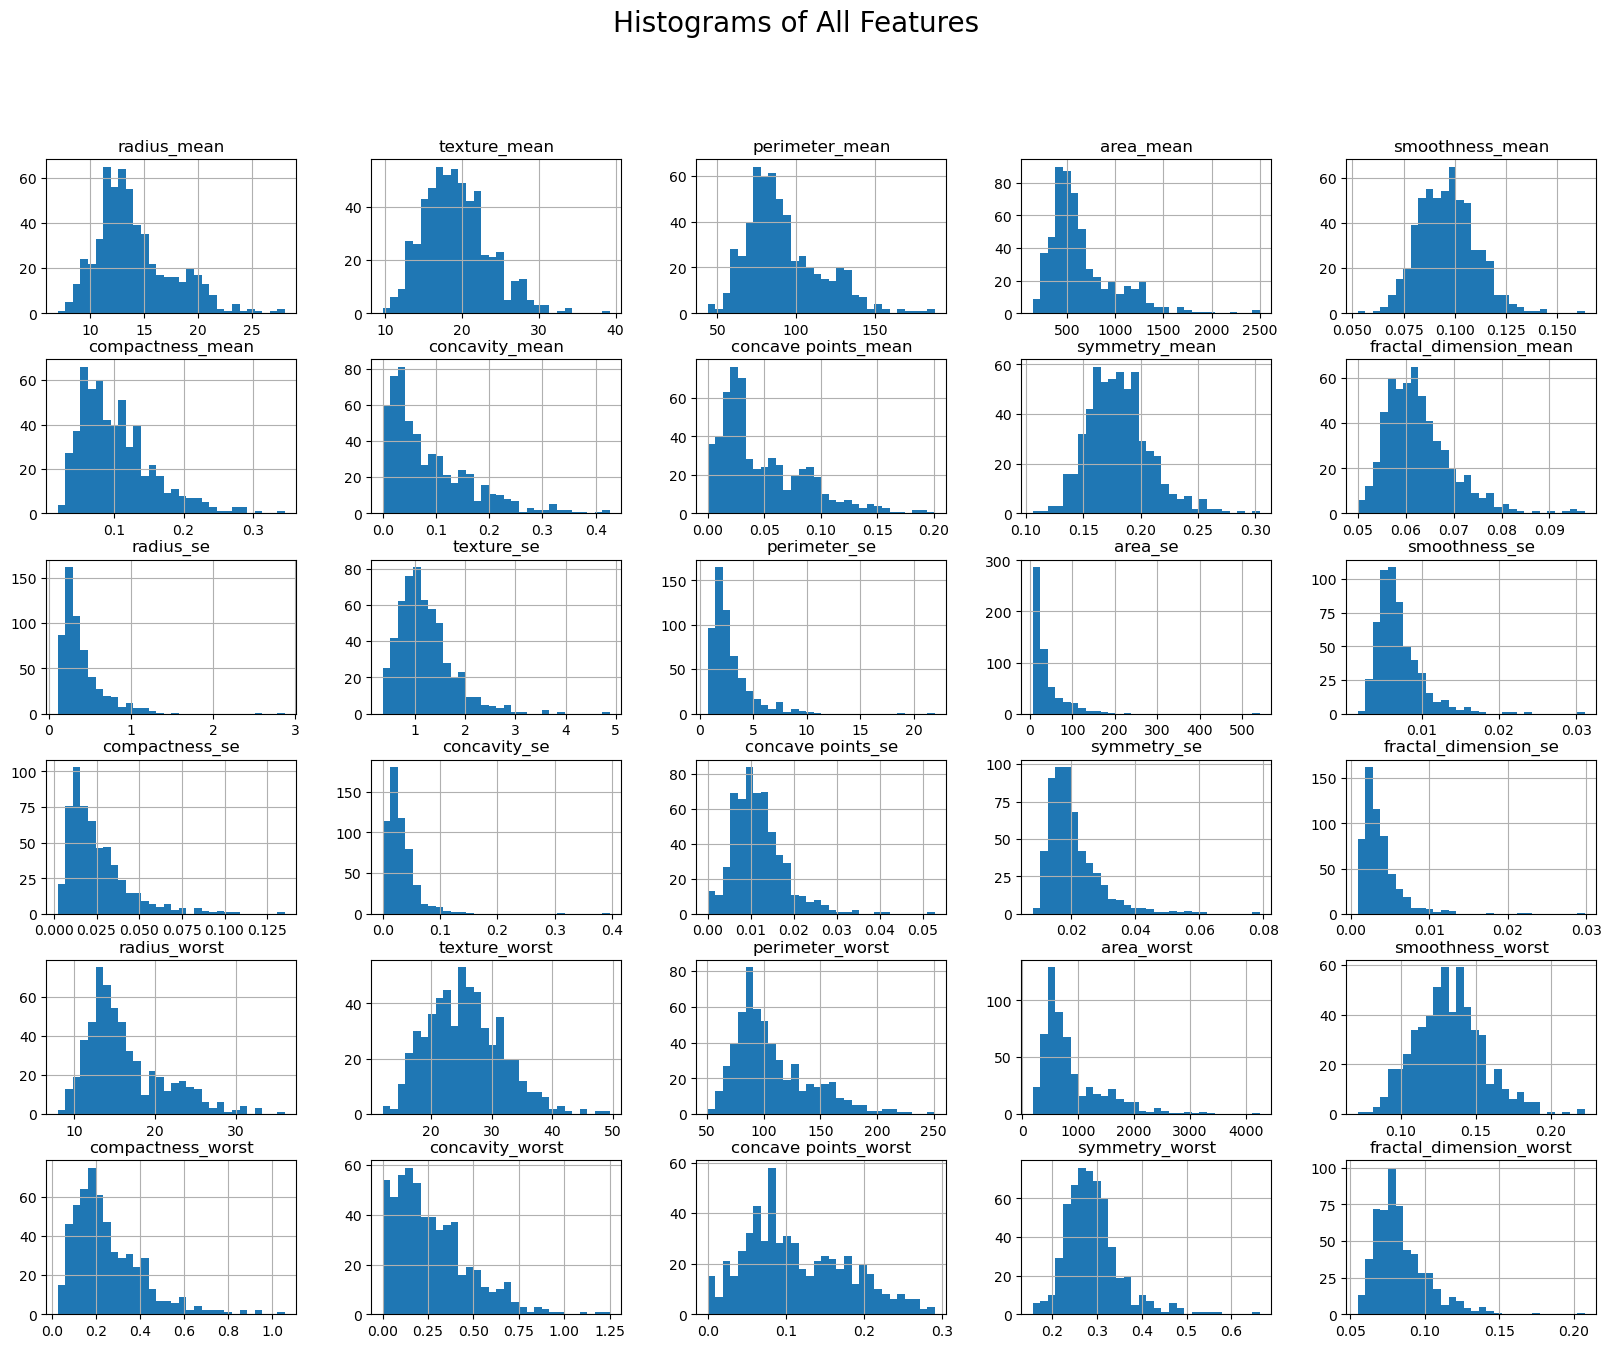

In [11]:
## Distribution of features
data.drop(['id', 'diagnosis'], axis=1).hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of All Features', fontsize=20)
plt.show()

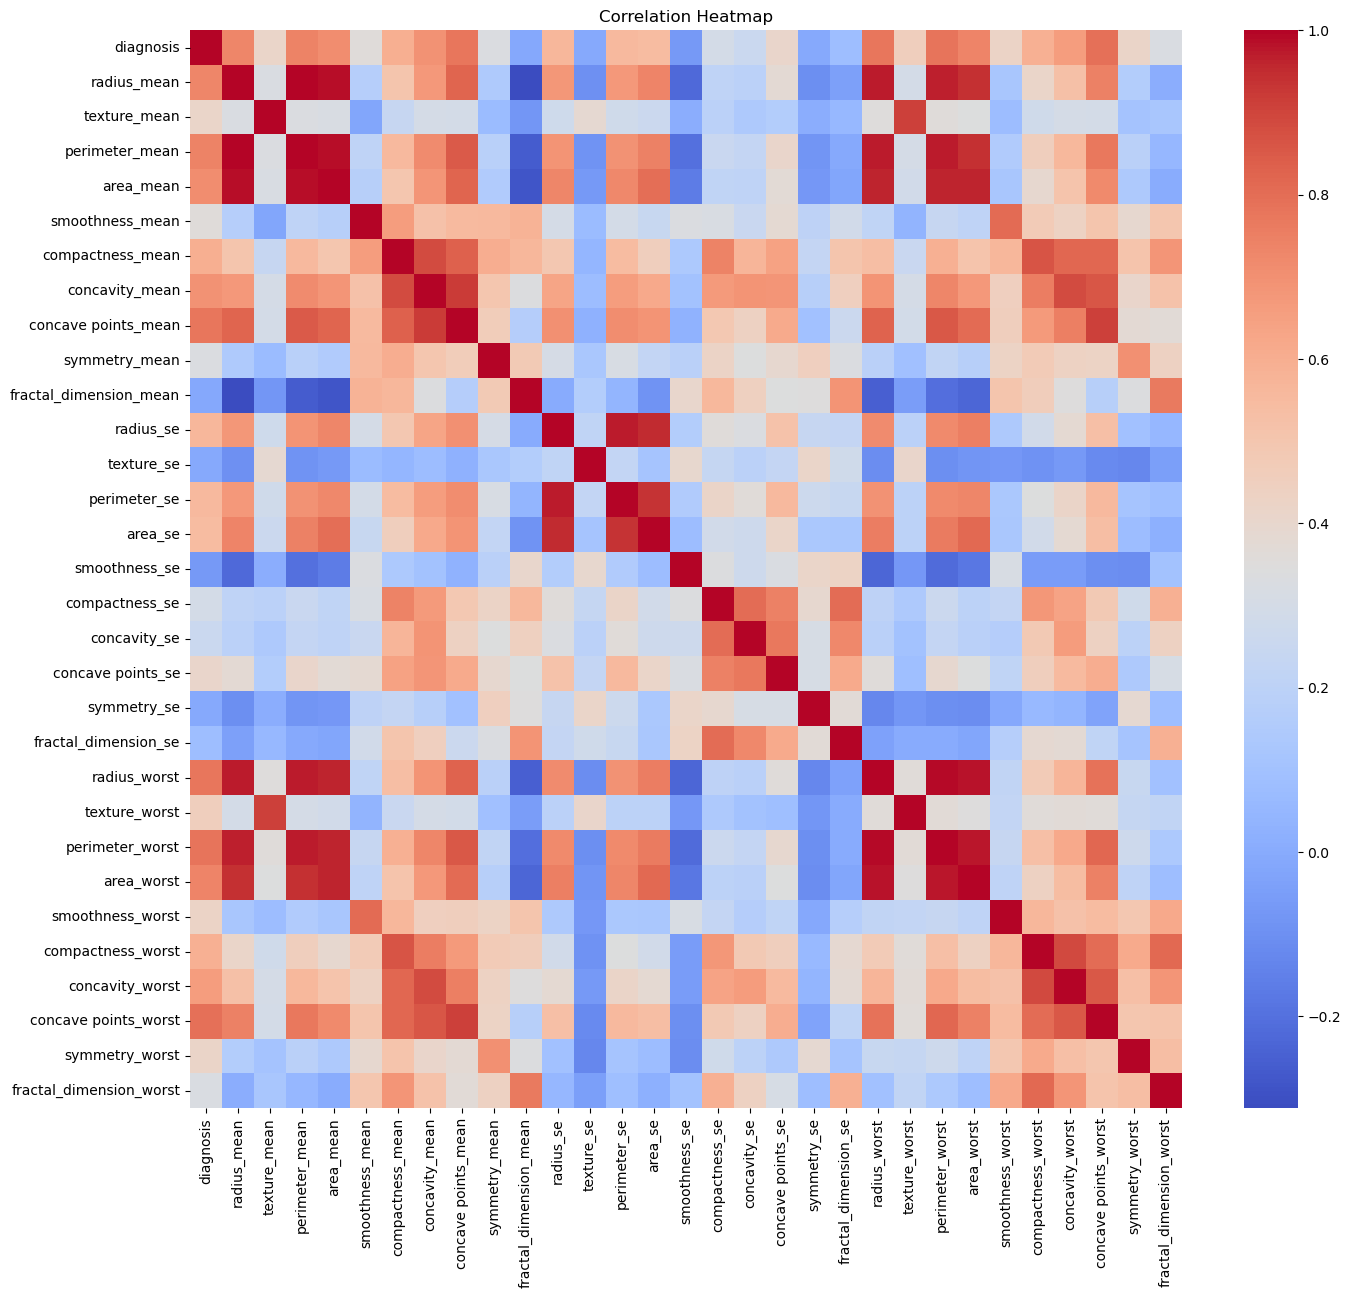

In [12]:
## Create a correlation plot between features
plt.figure(figsize=(16, 14))
correlation = data.drop('id', axis=1).corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

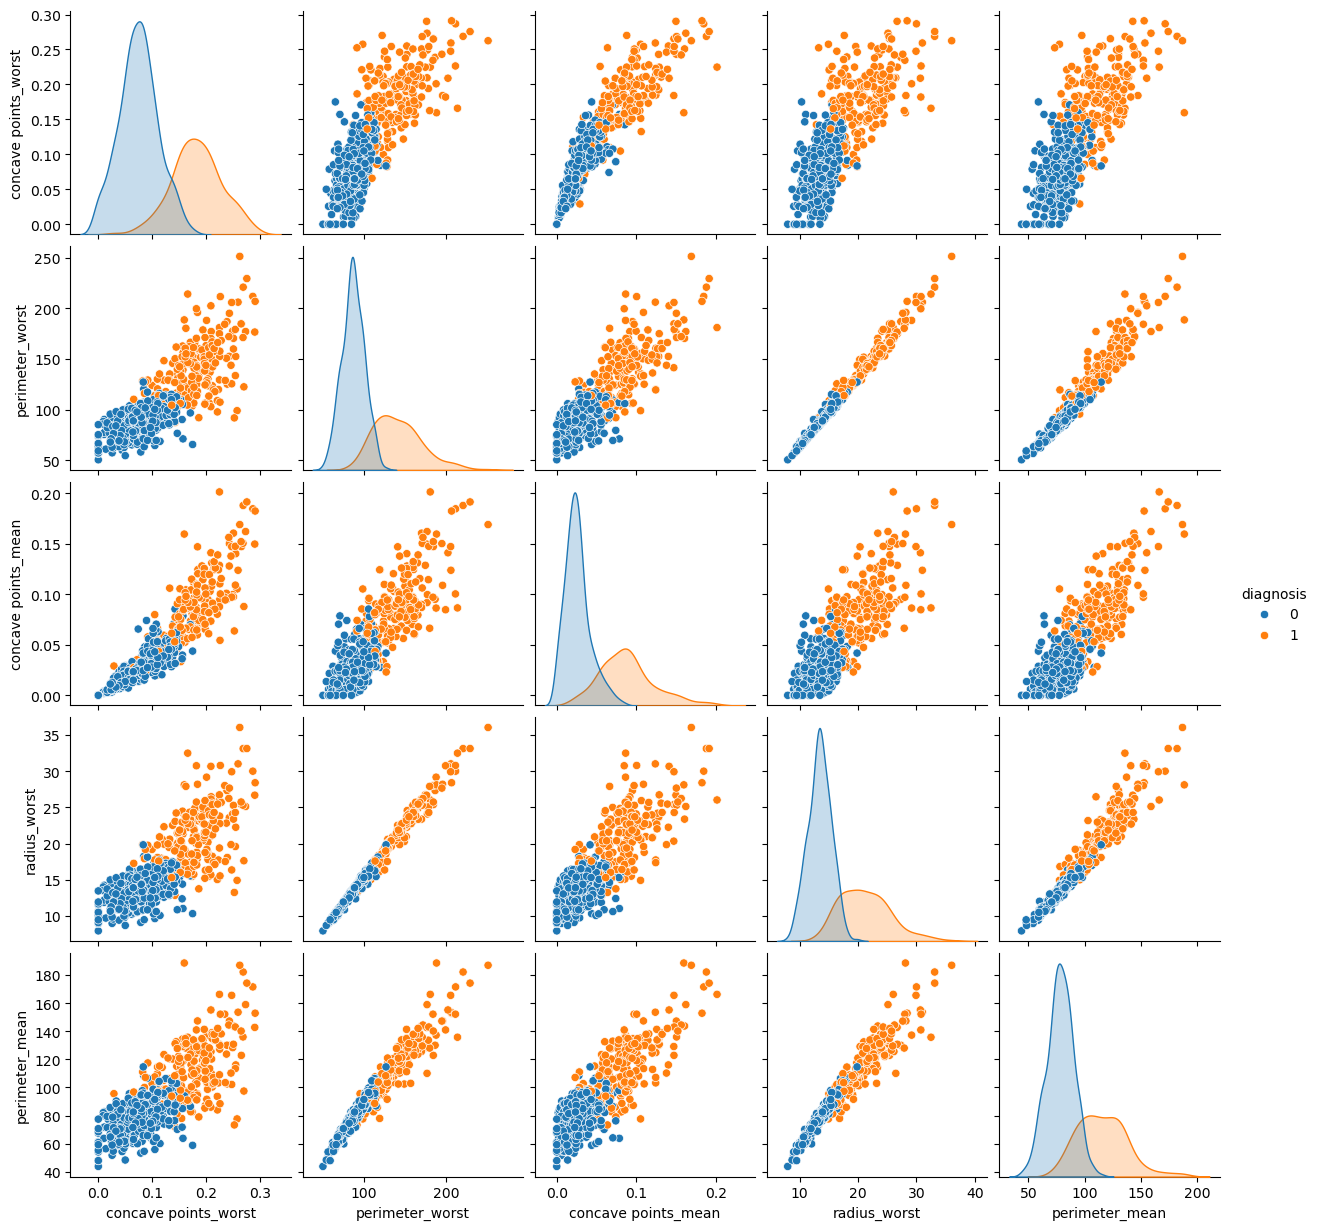

In [14]:
## Correlation plots between features by colour coded by diagnosis.
top_features = cor_target.index[1:6]  # top 5 excluding 'diagnosis'
sns.pairplot(data[top_features.tolist() + ['diagnosis']], hue='diagnosis')
plt.show()


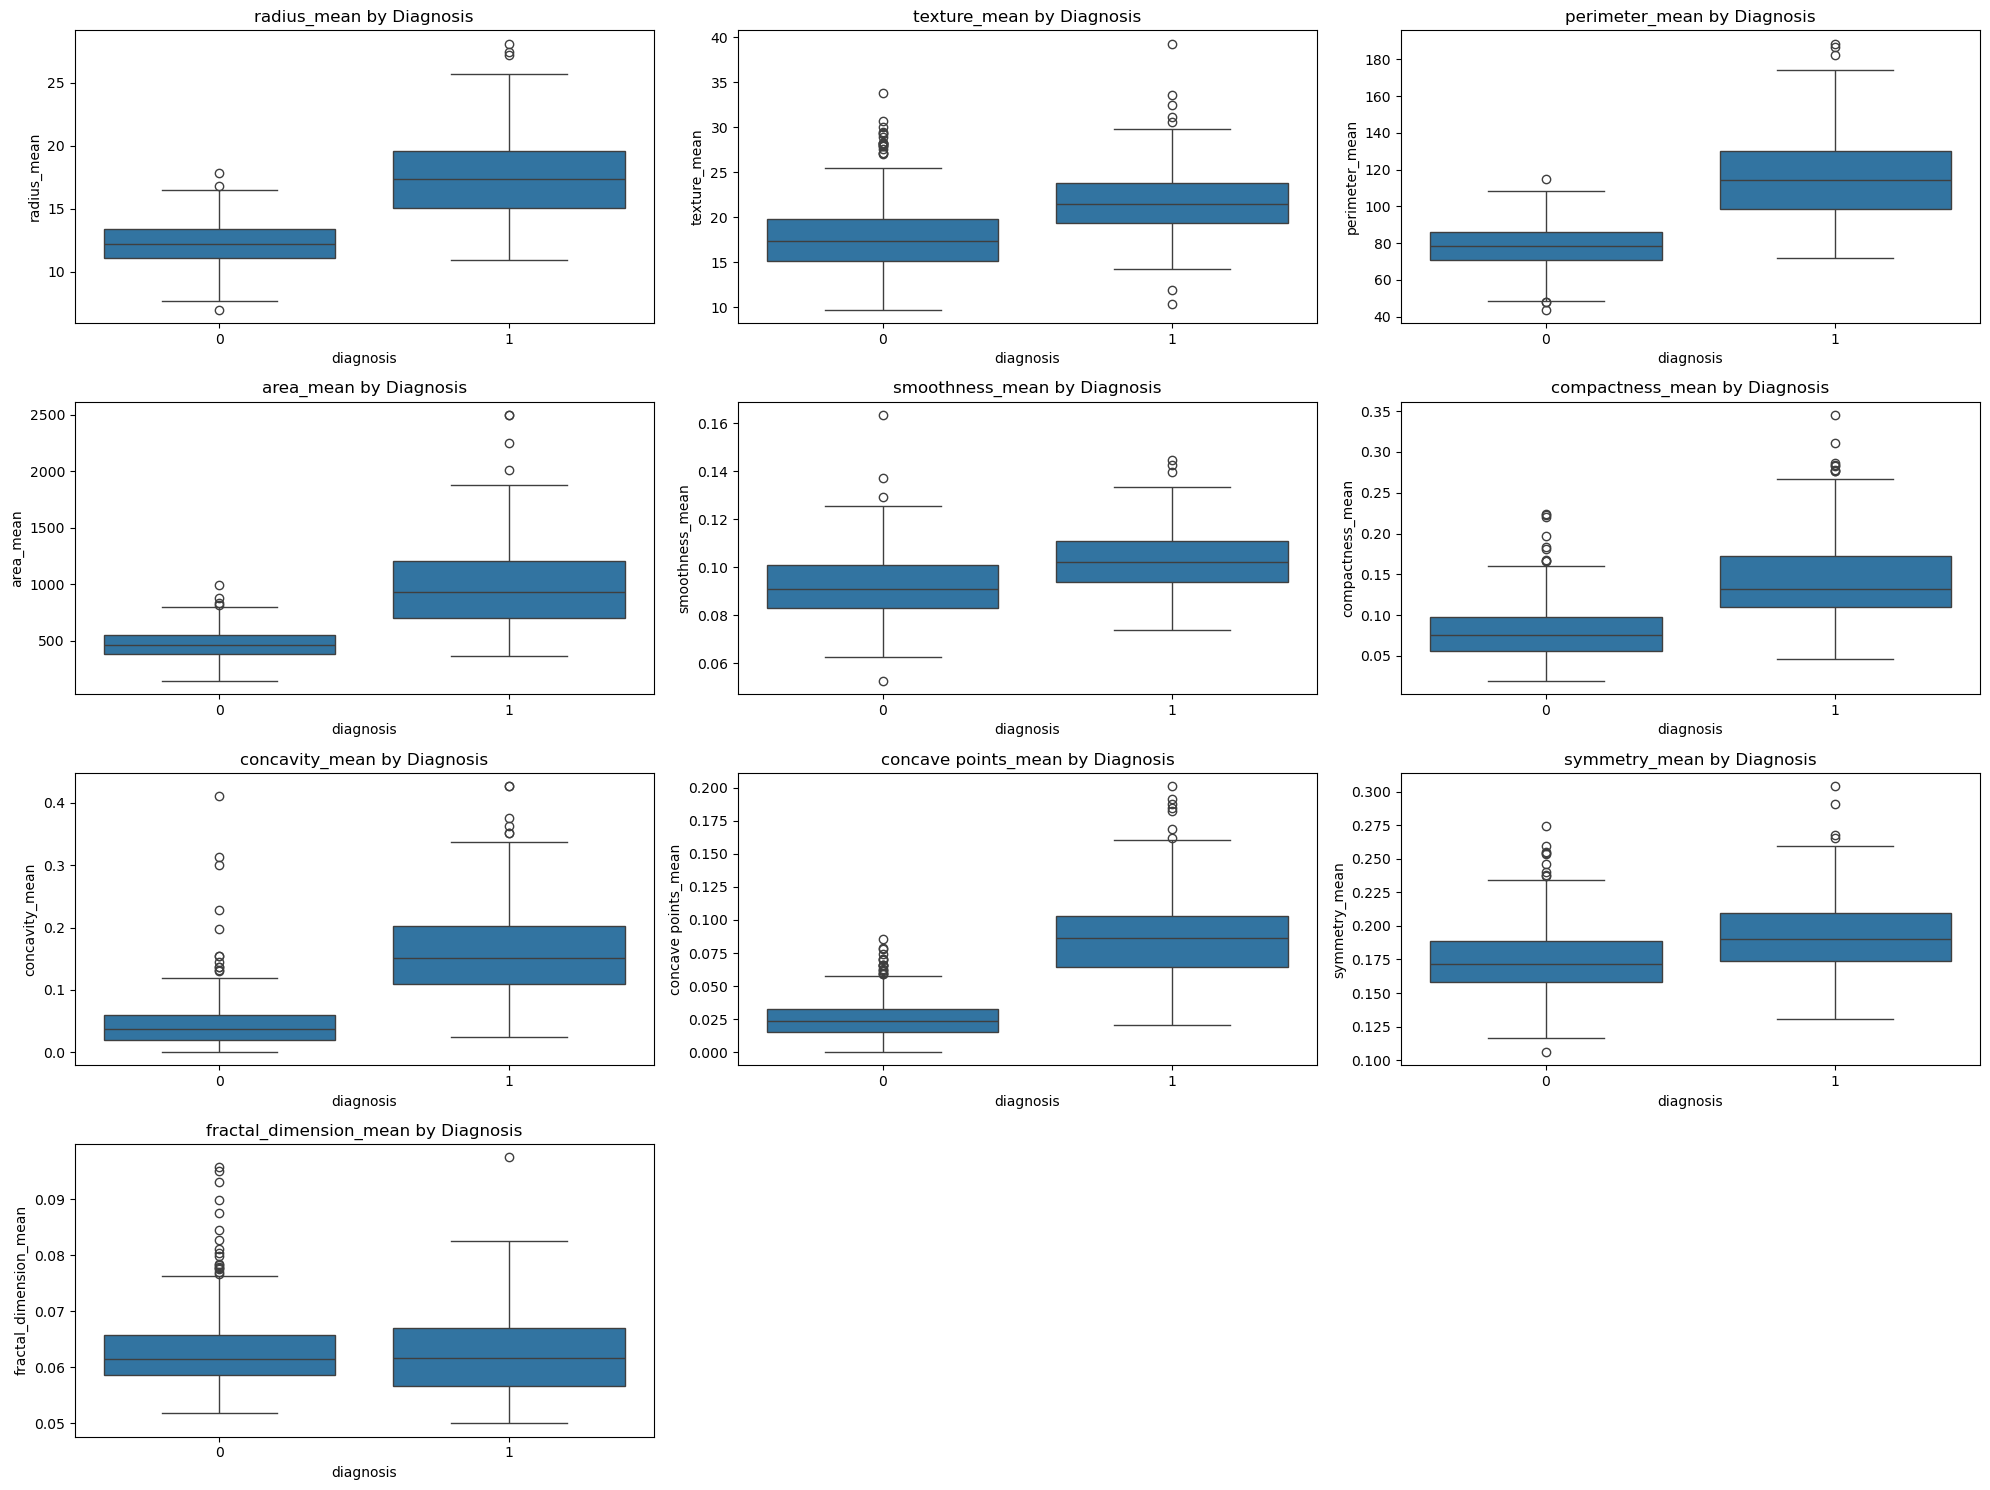

In [15]:
## Create boxplots for mean features by diagnosis

mean_features = [col for col in data.columns if '_mean' in col]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(mean_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

In [16]:
# Corr coeff values
corr_with_diagnosis = data.drop(columns='id').corr()


In [17]:
corr_with_diagnosis

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# Now lets setup the models for classification and compare models that would be most predictive 

In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc

In [20]:
## prepare data for train/test split
## adjust the split ratio later/as per ..

X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 30)
(114, 30)
(455,)
(114,)


In [21]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Logistic Regression performance:")
print(classification_report(y_test, y_pred_lr))

print("Random Forest performance:")
print(classification_report(y_test, y_pred_rf))


c:\Users\sanjb\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Random Forest performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



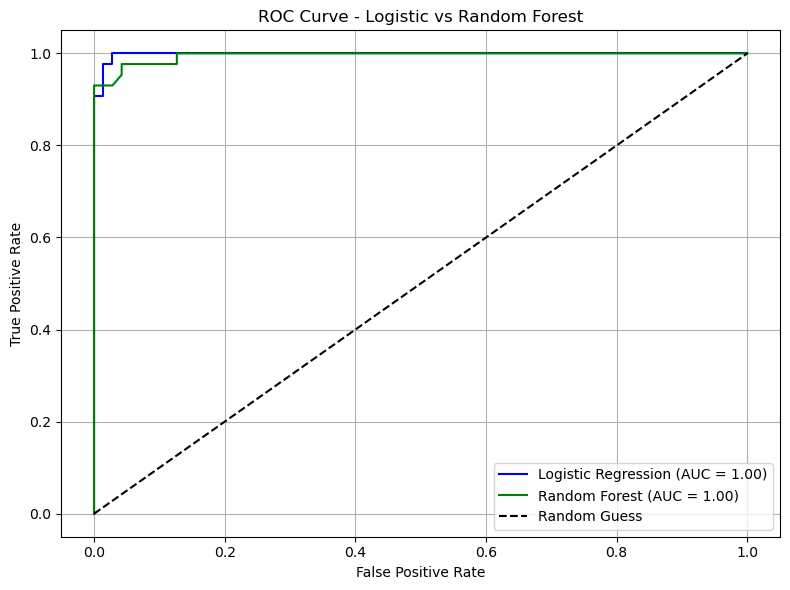

In [22]:
# Get predicted probabilities
y_prob_lr = lr.predict_proba(X_test)[:, 1]  # Logistic Regression
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Random Forest

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Logistic Regression with cross-validation
lr_cv = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr_cv, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression CV AUC scores: {lr_scores}")
print(f"Mean AUC: {np.mean(lr_scores):.4f}")

# Random Forest with cross-validation
rf_cv = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_cv, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest CV AUC scores: {rf_scores}")
print(f"Mean AUC: {np.mean(rf_scores):.4f}")

c:\Users\sanjb\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sanjb\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Logistic Regression CV AUC scores: [0.99529781 0.97265222 0.99742002 0.99845201 0.98452012]
Mean AUC: 0.9897
Random Forest CV AUC scores: [0.99582027 0.98400413 0.99819401 0.97574819 0.98529412]
Mean AUC: 0.9878


ROC curve saved as roc_curve.png


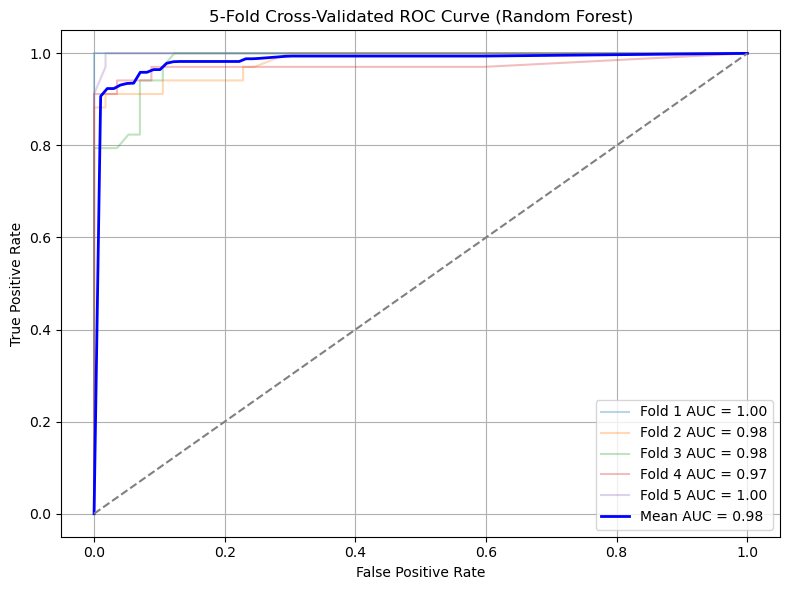

In [24]:
# Create model
model = RandomForestClassifier(random_state=42)

# Create stratified 5-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store values
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(8, 6))

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model.fit(X_cv_train, y_cv_train)
    y_proba = model.predict_proba(X_cv_val)[:, 1]  # proba for class 1 (Malignant)
    
    fpr, tpr, _ = roc_curve(y_cv_val, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Interpolate TPR
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    ax.plot(fpr, tpr, alpha=0.3, label=f'Fold {fold+1} AUC = {roc_auc:.2f}')

# Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

ax.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'Mean AUC = {mean_auc:.2f}')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('5-Fold Cross-Validated ROC Curve (Random Forest)')
ax.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.savefig('roc_curve.png', dpi=300)
print("ROC curve saved as roc_curve.png")

c:\Users\sanjb\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sanjb\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

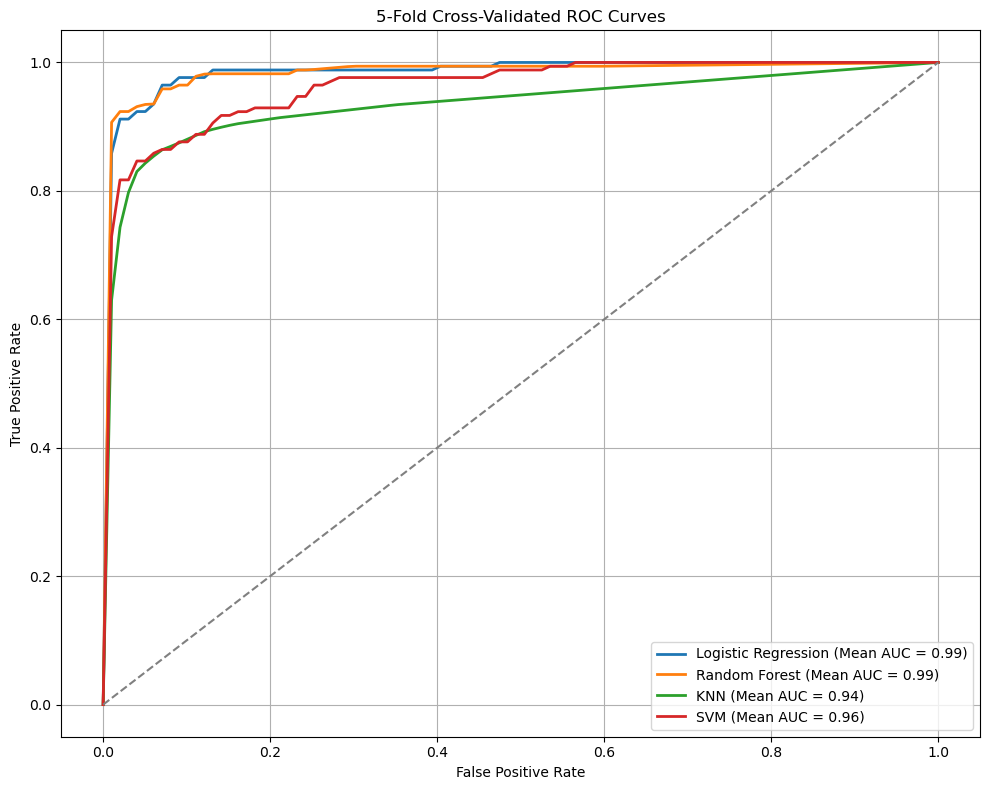

In [ ]:
## Compare logistic, knn, svm and random forest model performance based on 5 fold cross-validation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, kernel='rbf', random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for name, model in models.items():
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_cv_train, y_cv_train)
        y_proba = model.predict_proba(X_cv_val)[:, 1]

        fpr, tpr, _ = roc_curve(y_cv_val, y_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)

    plt.plot(mean_fpr, mean_tpr, lw=2,
             label=f'{name} (Mean AUC = {mean_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5-Fold Cross-Validated ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()
